## 데이터 크롤링 > 불용어 처리 > 핵심 키워드 선정 > 핵심 키워드가 들어간 핵심 리뷰 도출

In [161]:
import sqlite3 #sqlite랑 연결
import requests #크롤링
import numpy as np
import pandas as pd
import seaborn as sns
from bs4 import BeautifulSoup
import re
import os
import warnings
import konlpy
import matplotlib.pyplot as plt
%matplotlib inline

In [162]:
# 최대 줄 수 설정
pd.set_option('display.max_rows', 10)
# 최대 열 수 설정
pd.set_option('display.max_columns', 10)

## 평점 2점 리뷰 크롤링

In [163]:
addr = 'http://www.gevolution.co.kr/game/get_rate_list.asp?svc=273275&p=1&m=2'
result = requests.get(addr)
src = result.content
soup=BeautifulSoup(src,'html.parser')

In [164]:
review_data = ''
numberlist = ''

In [165]:
a = soup.select('.txt') #a는 리뷰
for r in a:
    review_data = review_data + r.get_text().strip()
    review_data = review_data + ('\n\n') #리뷰 사이 공백 추가 

review_data

'우선 앱이 너무 느려요... 뭐든지 누르면 2~3초는 기다려야 반응이 오네요. 너무 답답함!🤨 그리고 고객이 가장 원하는건 혜택을 받을 만큼 얼마나 실적을 쌓았나 확인하고 어떤 혜택을 받았는지 확인하는건데 이런거 보는것도 너무 불편해요. 해당 메뉴가 꽁꽁 숨겨져있는 느낌.\n\n해외에서 공인인증만료 핸드폰고장으로 다른폰에 인증받고싶은데 어떻게 해야하나요? 한국번호가 없는상태입니다\n\n계좌 비대면 개설 하고 계좌 유지수수료 부분 알려주세요\n\n무방문 신청으로 디지털 otp신청하는데 다 기록하고 신분증 촬영 과정에서 촬영 시 자꾸 앱이 리프레시 되는 과정이 발생합니다 거래가 필요한데 otp 신청과정 중 자꾸 리프레시 되어서 신청할 수가 없어요 해결책이 있으면 알려주세요 화나기 직전입니다ㅠ\n\n일단 메뉴구성이라든가 심플한데 사용하기 불편하고..카드 결제일 변경을 어디서 하는지 찾지를 못하겠음. 다른 뱅킹앱들은 찾기 쉽던데 이건 포기..그냥 고객센터에 굳이 전화해서 바꿈.. 또한 심플한데 무겁다는 느낌임. 갤럭시 9+인데 뱅킹앱 사용하다 멈춘건 이 앱이 처음임..\n\n다른 금융회사보다 많이 후짐..편리성 디자인\n\n언제 지문으로할수있게 할껀가요 전에 업데이트이후 지문 등록이안됨 최신기종인데 할수없다고나옥ᆢ\n\n해외 유심 사용시 로그인 안됩니다. 6020 LGN00300 이거 다른은행들은 상관없이 잘 되는데 씨티은행때문에 심 교체하는거 너무 불편합니다. 수정 안되나요?\n\n갤럭시 s10 해외폰(듀얼심)으로 씨티 모바일 로그인 후 계속 화면로딩만 되고 다음 화면으로 넘어가지 않습니다.. 전에는 문제 없었는데 최근 폰 업데이트 했는데 그 이후에 그런 것 같습니다. 어플 지웠다 다시 설치하고 해봐도 안되네요..\n\n등록된 지문으로 사용하고 있었는데 이번 업데이트후 등록된 지문이 있는데도 지문을 등록하라고 나와서 지문 삭제후 재등록하려고 해도 안되서 앱삭제후 재설치 했는데 지문등록을 할 수 없는 기기라고 나옵니다. 갤럭시 s10 5g 모델입니다.\n\n'

In [166]:
reviewlist = review_data.split('\n\n')
print(reviewlist)

['우선 앱이 너무 느려요... 뭐든지 누르면 2~3초는 기다려야 반응이 오네요. 너무 답답함!🤨 그리고 고객이 가장 원하는건 혜택을 받을 만큼 얼마나 실적을 쌓았나 확인하고 어떤 혜택을 받았는지 확인하는건데 이런거 보는것도 너무 불편해요. 해당 메뉴가 꽁꽁 숨겨져있는 느낌.', '해외에서 공인인증만료 핸드폰고장으로 다른폰에 인증받고싶은데 어떻게 해야하나요? 한국번호가 없는상태입니다', '계좌 비대면 개설 하고 계좌 유지수수료 부분 알려주세요', '무방문 신청으로 디지털 otp신청하는데 다 기록하고 신분증 촬영 과정에서 촬영 시 자꾸 앱이 리프레시 되는 과정이 발생합니다 거래가 필요한데 otp 신청과정 중 자꾸 리프레시 되어서 신청할 수가 없어요 해결책이 있으면 알려주세요 화나기 직전입니다ㅠ', '일단 메뉴구성이라든가 심플한데 사용하기 불편하고..카드 결제일 변경을 어디서 하는지 찾지를 못하겠음. 다른 뱅킹앱들은 찾기 쉽던데 이건 포기..그냥 고객센터에 굳이 전화해서 바꿈.. 또한 심플한데 무겁다는 느낌임. 갤럭시 9+인데 뱅킹앱 사용하다 멈춘건 이 앱이 처음임..', '다른 금융회사보다 많이 후짐..편리성 디자인', '언제 지문으로할수있게 할껀가요 전에 업데이트이후 지문 등록이안됨 최신기종인데 할수없다고나옥ᆢ', '해외 유심 사용시 로그인 안됩니다. 6020 LGN00300 이거 다른은행들은 상관없이 잘 되는데 씨티은행때문에 심 교체하는거 너무 불편합니다. 수정 안되나요?', '갤럭시 s10 해외폰(듀얼심)으로 씨티 모바일 로그인 후 계속 화면로딩만 되고 다음 화면으로 넘어가지 않습니다.. 전에는 문제 없었는데 최근 폰 업데이트 했는데 그 이후에 그런 것 같습니다. 어플 지웠다 다시 설치하고 해봐도 안되네요..', '등록된 지문으로 사용하고 있었는데 이번 업데이트후 등록된 지문이 있는데도 지문을 등록하라고 나와서 지문 삭제후 재등록하려고 해도 안되서 앱삭제후 재설치 했는데 지문등록을 할 수 없는 기기라고 나옵니다. 갤럭시 s10 5g 모델입니다.', '']


In [167]:
df2 = pd.DataFrame({"review":reviewlist})
df2.head()

,review
0,우선 앱이 너무 느려요... 뭐든지 누르면 2~3초는 기다려야 반응이 오네요. 너무 답답함!🤨 그리고 고객이 가장 원하는건 혜택을 받을 만큼 얼마나 실적을 쌓았나 확인하고 어떤 혜택을 받았는지 확인하는건데 이런거 보는것도 너무 불편해요. 해당 메뉴가 꽁꽁 숨겨져있는 느낌.
1,해외에서 공인인증만료 핸드폰고장으로 다른폰에 인증받고싶은데 어떻게 해야하나요? 한국번호가 없는상태입니다
2,계좌 비대면 개설 하고 계좌 유지수수료 부분 알려주세요
3,무방문 신청으로 디지털 otp신청하는데 다 기록하고 신분증 촬영 과정에서 촬영 시 자꾸 앱이 리프레시 되는 과정이 발생합니다 거래가 필요한데 otp 신청과정 중 자꾸 리프레시 되어서 신청할 수가 없어요 해결책이 있으면 알려주세요 화나기 직전입니다ㅠ
4,일단 메뉴구성이라든가 심플한데 사용하기 불편하고..카드 결제일 변경을 어디서 하는지 찾지를 못하겠음. 다른 뱅킹앱들은 찾기 쉽던데 이건 포기..그냥 고객센터에 굳이 전화해서 바꿈.. 또한 심플한데 무겁다는 느낌임. 갤럭시 9+인데 뱅킹앱 사용하다 멈춘건 이 앱이 처음임..


In [168]:
b=soup.select('.score3') #b는 평점
for r in b:
    value = r.get_text()
    numberlist = numberlist + value
    
numberlist = list(numberlist)

In [169]:
df = pd.DataFrame({"score":numberlist})
df.head()

,score
0,2
1,2
2,2
3,2
4,2


In [170]:
review = pd.merge(df,df2,left_index=True, right_index=True, how='left')

In [171]:
review.head()

,score,review
0,2,우선 앱이 너무 느려요... 뭐든지 누르면 2~3초는 기다려야 반응이 오네요. 너무 답답함!🤨 그리고 고객이 가장 원하는건 혜택을 받을 만큼 얼마나 실적을 쌓았나 확인하고 어떤 혜택을 받았는지 확인하는건데 이런거 보는것도 너무 불편해요. 해당 메뉴가 꽁꽁 숨겨져있는 느낌.
1,2,해외에서 공인인증만료 핸드폰고장으로 다른폰에 인증받고싶은데 어떻게 해야하나요? 한국번호가 없는상태입니다
2,2,계좌 비대면 개설 하고 계좌 유지수수료 부분 알려주세요
3,2,무방문 신청으로 디지털 otp신청하는데 다 기록하고 신분증 촬영 과정에서 촬영 시 자꾸 앱이 리프레시 되는 과정이 발생합니다 거래가 필요한데 otp 신청과정 중 자꾸 리프레시 되어서 신청할 수가 없어요 해결책이 있으면 알려주세요 화나기 직전입니다ㅠ
4,2,일단 메뉴구성이라든가 심플한데 사용하기 불편하고..카드 결제일 변경을 어디서 하는지 찾지를 못하겠음. 다른 뱅킹앱들은 찾기 쉽던데 이건 포기..그냥 고객센터에 굳이 전화해서 바꿈.. 또한 심플한데 무겁다는 느낌임. 갤럭시 9+인데 뱅킹앱 사용하다 멈춘건 이 앱이 처음임..


## 50 페이지까지 크롤링

In [172]:
for i in range(2,50):
    addr='http://www.gevolution.co.kr/game/get_rate_list.asp?svc=273275&p='
    addr+=str(i)
    addr+='&m=2' #2점짜리만 모은다 
    result = requests.get(addr)
    src = result.content
    soup=BeautifulSoup(src,'html.parser')

    review_data = ''
    numberlist = ''

    a = soup.select('.txt') #a는 리뷰
    for r in a:
        review_data = review_data + r.get_text().strip()
        review_data = review_data + ('\n\n') #리뷰 사이 공백 추가 

    b=soup.select('.score3')
    for r in b:
        value = r.get_text()
        numberlist = numberlist + value
    
    numberlist = list(numberlist)

    reviewlist = review_data.split('\n\n')
    
    df = pd.DataFrame({"score":numberlist})
    df2 = pd.DataFrame({"review":reviewlist})
    
    review_1 = pd.merge(df,df2,left_index=True, right_index=True, how='left')
    
    review = review.append(review_1)

In [173]:
review.head()

,score,review
0,2,우선 앱이 너무 느려요... 뭐든지 누르면 2~3초는 기다려야 반응이 오네요. 너무 답답함!🤨 그리고 고객이 가장 원하는건 혜택을 받을 만큼 얼마나 실적을 쌓았나 확인하고 어떤 혜택을 받았는지 확인하는건데 이런거 보는것도 너무 불편해요. 해당 메뉴가 꽁꽁 숨겨져있는 느낌.
1,2,해외에서 공인인증만료 핸드폰고장으로 다른폰에 인증받고싶은데 어떻게 해야하나요? 한국번호가 없는상태입니다
2,2,계좌 비대면 개설 하고 계좌 유지수수료 부분 알려주세요
3,2,무방문 신청으로 디지털 otp신청하는데 다 기록하고 신분증 촬영 과정에서 촬영 시 자꾸 앱이 리프레시 되는 과정이 발생합니다 거래가 필요한데 otp 신청과정 중 자꾸 리프레시 되어서 신청할 수가 없어요 해결책이 있으면 알려주세요 화나기 직전입니다ㅠ
4,2,일단 메뉴구성이라든가 심플한데 사용하기 불편하고..카드 결제일 변경을 어디서 하는지 찾지를 못하겠음. 다른 뱅킹앱들은 찾기 쉽던데 이건 포기..그냥 고객센터에 굳이 전화해서 바꿈.. 또한 심플한데 무겁다는 느낌임. 갤럭시 9+인데 뱅킹앱 사용하다 멈춘건 이 앱이 처음임..


## 데이터 csv 파일로 저장

In [174]:
#review.to_csv('city_2.csv')

## 불용어 처리

In [175]:
# 불용어 파일을 불러옵니다.
f=open("stop.txt", 'r', encoding='utf-8')

stop=[]
while True:
    line=f.readline()
    if not line: break
    stop.append(line[:-1])

        
f.close()
print(stop[:100])

['앱', '은행', '신한', '국민', '우리', '거', '수', '인', '업데이트', '때', '플', '안', '어플', '폰', '데', '후', '전', '중', '시', '번', '나', '하나', '뭐', '저', '이거', '동안', '너무', 'ㅡㅡ', '아', '휴', '아이구', '아이쿠', '아이고', '어', '나', '우리', '저희', '따라', '의해', '을', '를', '에', '의', '가', '으로', '로', '에게', '뿐이다', '의거하여', '근거하여', '입각하여', '기준으로', '예하면', '예를 들면', '예를 들자면', '저', '소인', '소생', '저희', '지말고', '하지마', '하지마라', '다른', '물론', '또한', '그리고', '비길수 없다', '해서는 안된다', '뿐만 아니라', '만이 아니다', '만은 아니다', '막론하고', '관계없이', '그치지 않다', '그러나', '그런데', '하지만', '든간에', '논하지 않다', '따지지 않다', '설사', '비록', '더라도', '아니면', '만 못하다', '하는 편이 낫다', '불문하고', '향하여', '향해서', '향하다', '쪽으로', '틈타', '이용하여', '타다', '오르다', '제외하고', '이 외에', '이 밖에', '하여야', '비로소']


In [176]:
# 워드클라우드를 만들어 줍니다. 이를 참고하여 불용어 사전을 구축합니다.
from wordcloud import WordCloud

def displayWordCloud(data = None, backgroundcolor = 'white', width=1280, height=768):
    wordcloud = WordCloud(
                        font_path = '../앱분석/Noto_Sans_KR/NotoSansKR-Black.otf', 
                        stopwords = stop, 
                        background_color = backgroundcolor, 
                        width = width, height = height, 
                        random_state=42).generate(data)
    plt.figure(figsize = (15 , 10))
    plt.imshow(wordcloud)
    plt.axis("off")
    plt.show()

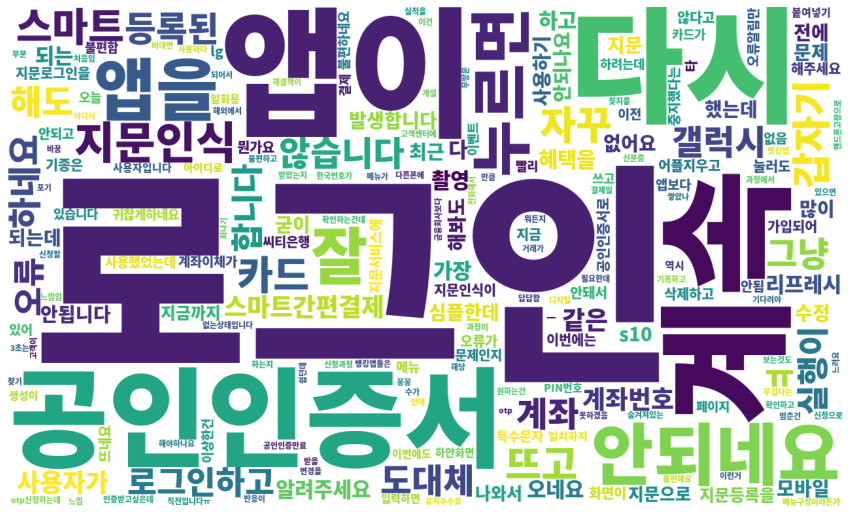

In [177]:
review_cloud = " ".join(review["review"])
displayWordCloud(review_cloud)

In [178]:
from konlpy.tag import Kkma
warnings.filterwarnings('ignore')
%matplotlib inline
kkma = Kkma()

## 평점 1점, 2점 리뷰 합침

In [179]:
df1 = pd.read_csv('../앱분석/city_1.csv', header='infer',encoding='utf-8',engine='python')#error_bad_lines=False,
df1 = df1.drop('Unnamed: 0', axis=1)
df2 = pd.read_csv('../앱분석/city_2.csv', header='infer',encoding='utf-8',engine='python')#error_bad_lines=False,
df2 = df2.drop('Unnamed: 0', axis=1)

In [180]:
df12 = df1.append(df2)
df12 = df12.reset_index()
#df45 = df12.drop('index', axis=1)

df12

,index,score,review
0,0,1,업데이트 후 계좌 입력이 안됩니다. 이체시 클릭해서 입력해야하는 창에 아무리 터치해도 키보드가 안뜹니다. 안드로이드 엘지폰입니다.
1,1,1,"앱이 너무 쓰레기다. 신용카드 때문에 어쩔 수 없이 쓰고 있는데 이건 뭐 메뉴도 불편하고, 포인트 적립 확인도 안되고, 앱결제 이런것도 없는거 같고... 앱 때문에 카드가 쓰기 싫어질 지경이다."
2,2,1,머고 이런어플 처음이네 신청 다해놓고 확인눌리니 넘어가질 않네 ㅡㅡ미친 몇번을 한겨
3,3,1,다른 카드사 앱에 비해 보기 불편함..ㅠㅠ 앱 디자인좀 바꿔주세요.
4,4,1,은행말고 카드앱은 좀 따로 만듭시다. 타금융사 다 앱카드 만든지가 언젠데 아직도 뭉개고 있습니까 글로벌 씨티님. 모바일 결제하기 제일 불편한 카드라 페이 결제할땐 딴 카드로 자꾸 손이 가요.
...,...,...,...
307,55,2,씨티카드앱 없어진대서 깔았는데 공인인증서 사용자가 일치하지않는다그래서 멘붕;7번쯤 시도하다 아이디로 로그인. 이상한건 같은 공인인증서 등록하려 하니 첫번째는 사용자가 일치하지 않는다 하고 두번째는 이미 등록된 인증서라 나옴. 그리거 아이디로 로그인 할때 같은 공인인증서로 본인 확인 함 ㅡ.ㅡ 사용자가 일치하지 않는데 본인인증을 어찌 같은 인증서로 ㅋㅋㅋㅋ 보안 키보드에 문제있는듯
308,56,2,사용되는거 맞나요? 내계좌조회가 영어숫자랑같이정의되지 않는 오류라구 자꾸뜨는데요.....시스템웹뷰는 자동업뎃 되있어요. 로긴할때부터 오류 구버전도 지워보구 다시 받구 다시 해보구 와이파이 엘티이 장소 다르게도 다해봤는데도 안되요. 노트5 사용.
309,57,2,로그인안되고 하얀화면..;; 앱잘 쓰고있었는데 갑자기 로그인도 못하게 화면이 하얀화면... 상태에서 멈춰서 사용할수가 없어요. 빨리 고쳐주세요!!!
310,58,2,"이체금액오류 100,500원을 입력하면 100,005원으로 200,050원 입력하면 200,500원 이런식으로 금액이 입력됩니다.확인안하고 이체확인 눌렀다가 잘못이체됐습니다. 가장 중요한 금액 오류라니..앱을 몇번을 다시다운받고 해봐도 똑같네요. 기존 앱은 언제까지 쓸수있나요? 계속 쓰고 싶은데."


In [181]:
df12.review

0      업데이트 후 계좌 입력이 안됩니다. 이체시 클릭해서 입력해야하는 창에 아무리 터치해도 키보드가 안뜹니다. 안드로이드 엘지폰입니다.                                                                                                                                              
1      앱이 너무 쓰레기다. 신용카드 때문에 어쩔 수 없이 쓰고 있는데 이건 뭐 메뉴도 불편하고, 포인트 적립 확인도 안되고, 앱결제 이런것도 없는거 같고... 앱 때문에 카드가 쓰기 싫어질 지경이다.                                                                                                          
2      머고 이런어플 처음이네 신청 다해놓고 확인눌리니 넘어가질 않네 ㅡㅡ미친 몇번을 한겨                                                                                                                                                                        
3      다른 카드사 앱에 비해 보기 불편함..ㅠㅠ 앱 디자인좀 바꿔주세요.                                                                                                                                                                                 
4      은행말고 카드앱은 좀 따로 만듭시다. 타금융사 다 앱카드 만든지가 언젠데 아직도 뭉개고 있습니까 글로벌 씨티님. 모바일 결제하기 제일 불편한 카드라 페이 결제할땐 딴 카드로 자꾸 손이 가요

## 평점 1점, 2점 리뷰 워드클라우드

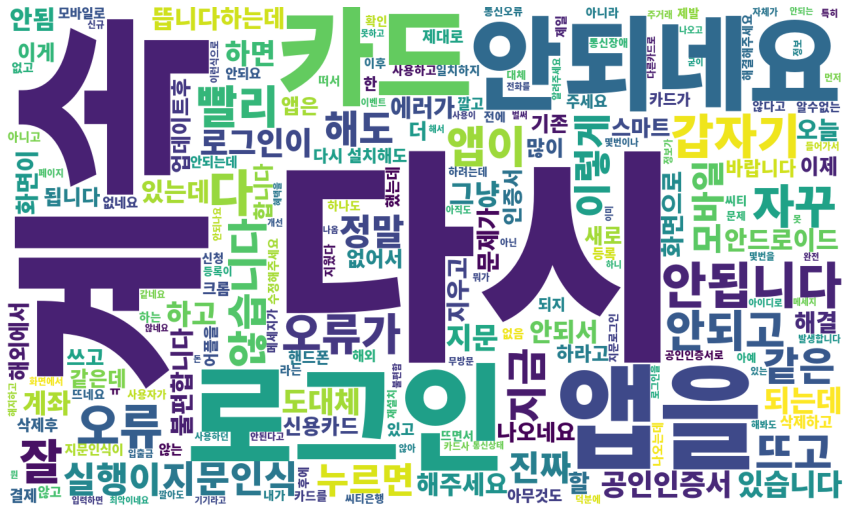

In [182]:
review_cloud = " ".join(df12["review"])
displayWordCloud(review_cloud)

In [183]:
# 사이킷런의 CountVectorizer 를 통해 벡터화 합니다.
# vectorizer 라는 변수에 CountVectorizer 를 담습니다.
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer(analyzer = 'word', # 캐릭터 단위로 벡터화 할 수도 있습니다.
                             tokenizer = None, # 토크나이저를 따로 지정해 줄 수도 있습니다.
                             preprocessor = None, # 전처리 도구
                             stop_words = stop, # 불용어 nltk등의 도구를 사용할 수도 있습니다.
                             min_df = 3, # 토큰이 나타날 최소 문서 개수로 오타나 자주 나오지 않는 특수한 전문용어 제거에 좋습니다. 
                             max_features = 100 # 만들 피처의 수, 단어의 수
                            )
vectorizer

CountVectorizer(analyzer='word', binary=False, decode_error='strict',
                dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
                lowercase=True, max_df=1.0, max_features=100, min_df=3,
                ngram_range=(1, 1), preprocessor=None,
                stop_words=['앱', '은행', '신한', '국민', '우리', '거', '수', '인', '업데이트',
                            '때', '플', '안', '어플', '폰', '데', '후', '전', '중', '시',
                            '번', '나', '하나', '뭐', '저', '이거', '동안', '너무', 'ㅡㅡ',
                            '아', '휴', ...],
                strip_accents=None, token_pattern='(?u)\\b\\w\\w+\\b',
                tokenizer=None, vocabulary=None)

In [184]:
# df12['review'] 만 벡터화 합니다.
feature_vector = vectorizer.fit_transform(df12['review'])
feature_vector.shape

(312, 100)

In [185]:
# vectorizer 에서 get_feature_names 를 추출합니다.
vocab = vectorizer.get_feature_names()
print(len(vocab))
vocab[:10]

100


['갑자기', '같은', '같은데', '결제', '계속', '계좌', '공인인증서', '그냥', '기존', '깔고']

In [186]:
# 각 리뷰마다 등장하는 단어에 빈도수가 표현됩니다. 0 은 등장하지 않음을 의미합니다.
pd.DataFrame(feature_vector[:10].toarray(), columns=vocab).head()

,갑자기,같은,같은데,결제,계속,...,해주세요,핸드폰,했는데,화면으로,화면이
0,0,0,0,0,0,...,0,0,0,0,0
1,0,0,0,0,0,...,0,0,0,0,0
2,0,0,0,0,0,...,0,0,0,0,0
3,0,0,0,0,0,...,0,0,0,0,0
4,0,0,0,0,0,...,0,0,0,0,0


In [187]:
# 위에서 구한 단어벡터를 더하면 단어가 전체에서 등장하는 횟수를 알 수 있습니다.
# 벡터화 된 피처를 확인해 봄
# Bag of words 에 몇 개의 단어가 들어있는지 확인
dist = np.sum(feature_vector, axis=0)
    
df_freq = pd.DataFrame(dist, columns=vocab)
df_freq

,갑자기,같은,같은데,결제,계속,...,해주세요,핸드폰,했는데,화면으로,화면이
0,21,15,10,6,42,...,9,6,6,8,8


In [188]:
# 행과 열의 축을 T로 바꿔주고 빈도수로 정렬합니다.
df_freq.T.sort_values(by=0, ascending=False).head(10)

,0
다시,57
계속,42
로그인,31
앱을,29
안됩니다,26
안되네요,26
카드,26
갑자기,21
오류,21
자꾸,20


In [189]:
# ["token", "freq"] 라는 컬럼명을 주어 위에서 만든 데이터프레임을 변환합니다.
df_freq_T = df_freq.T.reset_index()
df_freq_T.columns = ["token", "freq"]
df_freq_T.head()

,token,freq
0,갑자기,21
1,같은,15
2,같은데,10
3,결제,6
4,계속,42


In [190]:
# TfidfTransformer 를 불러와서 가중치를 주어 벡터화 합니다.
# transformer 라는 변수로 저장하고 재사용합니다.
#smooth_idf=False
#피처를 만들 때 0으로 나오는 항목에 대해 작은 값을 더해서(스무딩을 해서) 피처를 만들지 아니면 그냥 생성할지를 결정
from sklearn.feature_extraction.text import TfidfTransformer
transformer = TfidfTransformer(smooth_idf=False)
transformer

TfidfTransformer(norm='l2', smooth_idf=False, sublinear_tf=False, use_idf=True)

In [191]:
# fit_transform 으로 가중치를 적용하고 결과를 feature_tfidf 로 받습니다.
feature_tfidf = transformer.fit_transform(feature_vector)
feature_tfidf.shape

(312, 100)

In [192]:
# 각 row에서 전체 단어가방에 있는 어휘에서 등장하는 단어에 대한 one-hot-vector에 TF-IDF 가중치 반영한 결과를 봅니다.
# feature_tfidf.toarray() 로 배열로 만들고  데이터 프레임을 만들어 tfidf_freq 라는 변수에 할당해서 봅니다.
tfidf_freq = pd.DataFrame(feature_tfidf.toarray(), columns=vocab)
tfidf_freq.head() 

,갑자기,같은,같은데,결제,계속,...,해주세요,핸드폰,했는데,화면으로,화면이
0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0


## 핵심 키워드 선정

In [193]:
# tfidf_freq를 sum 으로 가중치를 다 더해줍니다.
df_tfidf = pd.DataFrame(tfidf_freq.sum())
df_tfidf_top = df_tfidf.sort_values(by=0, ascending=False)
df_tfidf_top.head(15)

,0
다시,16.994805
계속,14.585985
안됩니다,11.074996
앱을,10.981048
카드,10.866332
...,...
갑자기,9.194307
뜨고,8.179285
지금,7.784629
안되고,7.569012


In [194]:
#핵심 키워드 : 카드, 로그인, 에러

b= df12.review

card=[]
login=[]
error=[]

for i in range(len(b)):
    if str(b[i]).find("카드")>0:

        card.append(b[i])
        
    elif str(b[i]).find("로그인")>0:
        
        login.append(b[i])
        
    elif str(b[i]).find("오류")>0:
        
        error.append(b[i])
    
    else:
        pass
    i+=1

In [195]:
login

['전화 상담이랑 pc채팅 상담을 안해줘서 모바일 상담을 받기 위해 고객센터로 들어가서 채팅 상담을 눌렀는데 분명 로그인 한 상태로 들어갔음에도 로그인 한 후에 서비스를 이용하라고 로그인 창이 뜸. 그래서 또 로그인하면 기본 화면으로 돌아가서 다시 계속 반복해야됨. 고객센터는 왜 있는지 모르겠다',
 '타기관인증서등록하기가 계속 오류뜹니다. 재발행해서 해봐도 자꾸 정보가 일치하지 않다고 뜨네요 예전에 등록해서 잘썻는데 왜그런거죠? 로그인해서 고객상담문의해도 자꾸 로그인하라고만 반복이고 재설치도 수십번 인증서발행도 수십번 머리에서 폭탄이 터질거같아요 해결법좀 주세요',
 '직장인신용대출 신청 과정 중, 재직 및 소득 확인 단계에서 공인인증서 로그인을 하면 "[JEXS0000000]정의되지 않은 오류가 발생하였습니다." 라는 메세지가 뜹니다. 어플 삭제후 재설치도 해봤고 수차례 반복해도 마찬가지입니다. 무슨 사유 인지요??',
 '지문 로그인 잘 이용했었는데 왜 업데이트 이후에는 지문 로그인을 지원하지 않는다고 나오는 거죠? 기기는 V20입니다.',
 '업데이트후 지문로그인이 안되며, 공인인증서로 로인후 지문 해지도 실패함. 앱 삭제후 재설치후 지문인식을 하려하니 지원하지 않는 휴대폰이라고 나옴. 전부터 앱을 업데이트 할수록 느려지더니 이제는 지문인식도 안됨... 점점 쓰레기앱으로 변신하는중인듯...',
 '오늘 업데이트 하니까 지문서비스에 가입되어있지 않다면서 지문로그인 안 되네요... 그래서 다시 설정해야하나 생각이 들어서 다시 설정하려니 이미 지문 로그인이 신청되어있다고 나오네요.... 오히려 업데이트해서 앱 사용하는데 불편합니다 지문해지하고 다시 등록 하려고 해도 해지도 안 되고 하....진짜...',
 '갑자기 잘되던 모바일앱이 업데이트 이후 지문등록 공인 인증서 로그인이 안되네요..오직 아이디로 로그인만 되는데 해결 좀 해죠요....',
 '갤럭시노트5 입니다. 앱 업데이트 전에는 지문 로그인이 가능했는데 안되길래 앱을 지우고 다시 깔아서 시도해보니 이

In [196]:
pd.DataFrame(login)

,0
0,전화 상담이랑 pc채팅 상담을 안해줘서 모바일 상담을 받기 위해 고객센터로 들어가서 채팅 상담을 눌렀는데 분명 로그인 한 상태로 들어갔음에도 로그인 한 후에 서비스를 이용하라고 로그인 창이 뜸. 그래서 또 로그인하면 기본 화면으로 돌아가서 다시 계속 반복해야됨. 고객센터는 왜 있는지 모르겠다
1,타기관인증서등록하기가 계속 오류뜹니다. 재발행해서 해봐도 자꾸 정보가 일치하지 않다고 뜨네요 예전에 등록해서 잘썻는데 왜그런거죠? 로그인해서 고객상담문의해도 자꾸 로그인하라고만 반복이고 재설치도 수십번 인증서발행도 수십번 머리에서 폭탄이 터질거같아요 해결법좀 주세요
2,"직장인신용대출 신청 과정 중, 재직 및 소득 확인 단계에서 공인인증서 로그인을 하면 ""[JEXS0000000]정의되지 않은 오류가 발생하였습니다."" 라는 메세지가 뜹니다. 어플 삭제후 재설치도 해봤고 수차례 반복해도 마찬가지입니다. 무슨 사유 인지요??"
3,지문 로그인 잘 이용했었는데 왜 업데이트 이후에는 지문 로그인을 지원하지 않는다고 나오는 거죠? 기기는 V20입니다.
4,"업데이트후 지문로그인이 안되며, 공인인증서로 로인후 지문 해지도 실패함. 앱 삭제후 재설치후 지문인식을 하려하니 지원하지 않는 휴대폰이라고 나옴. 전부터 앱을 업데이트 할수록 느려지더니 이제는 지문인식도 안됨... 점점 쓰레기앱으로 변신하는중인듯..."
...,...
30,그전에 바이오로그인 간편하게 잘돼서 별다섯개짜리 어플이었는데 업데이트하고부터 안돼서 어플지우고 새로깔았는데 이번에는 바이오로그인이 지원되지않는 기기라고하네요.. 업데이트하는건 좋은데 그전 기능은 손상시키지 말아주세요.. 저거 안돼서 어플지우고 새로깔고 로그인하고 뭐하고 잘되던어플 ..1시간반 날렸습니다. 피곤해죽겠는데 괜히 업데이트해서..ㅠ 무튼 지금 pin으로 로그인하는데 해결부탁드립니다. 기종은 lg v20쓰고있습니다
31,업데이트 되더니 지문인식 기능이 실행이 안 돼요ㅜㅜ 지문인식 설정하라고 창이 계속 떠서 공인인증서로 로그인 후 설정 들어가서 지문인식 눌러도 신청이 완료 되었다고만 뜨고 다음 로그인 때 계속 지문인식 설정하라는 창만 뜨네요. 완전 불편ㅜㅜ
32,B000007 자료가 존재하지 않습니다. 오류 이거 뭔가요? 한참 된거 같은데 계속되네요. 로그인 자체가 불가능함
33,공인인증서 비번에 특수문자 들어가는데 특수문자 들어갔다고 인증서 로그인이 안됨 어처구니 없음


In [197]:
# 사이킷런의 CountVectorizer 를 통해 벡터화 합니다.
# vectorizer 라는 변수에 CountVectorizer 를 담습니다.
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer(analyzer = 'word', # 캐릭터 단위로 벡터화 할 수도 있습니다.
                             tokenizer = None, # 토크나이저를 따로 지정해 줄 수도 있습니다.
                             preprocessor = None, # 전처리 도구
                             stop_words = stop, # 불용어 nltk등의 도구를 사용할 수도 있습니다.
                             min_df = 3, # 토큰이 나타날 최소 문서 개수로 오타나 자주 나오지 않는 특수한 전문용어 제거에 좋습니다. 
                             max_features = 100 # 만들 피처의 수, 단어의 수
                            )
vectorizer

CountVectorizer(analyzer='word', binary=False, decode_error='strict',
                dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
                lowercase=True, max_df=1.0, max_features=100, min_df=3,
                ngram_range=(1, 1), preprocessor=None,
                stop_words=['앱', '은행', '신한', '국민', '우리', '거', '수', '인', '업데이트',
                            '때', '플', '안', '어플', '폰', '데', '후', '전', '중', '시',
                            '번', '나', '하나', '뭐', '저', '이거', '동안', '너무', 'ㅡㅡ',
                            '아', '휴', ...],
                strip_accents=None, token_pattern='(?u)\\b\\w\\w+\\b',
                tokenizer=None, vocabulary=None)

In [198]:
# df12['review'] 만 벡터화 합니다.
# 핵심 키워드는 login
feature_vector = vectorizer.fit_transform(login)
feature_vector.shape

(35, 26)

## TF-IDF

In [199]:
# fit_transform 으로 가중치를 적용하고 결과를 feature_tfidf 로 받습니다.
feature_tfidf = transformer.fit_transform(feature_vector)
feature_tfidf.shape

(35, 26)

In [200]:
# vectorizer 에서 get_feature_names 를 추출합니다.
vocab = vectorizer.get_feature_names()
print(len(vocab))
vocab[:10]

26


['계속', '공인인증서', '공인인증서로', '나오네요', '다시', '대체', '등록', '뜨고', '뜨네요', '로그인']

In [201]:
# 각 row에서 전체 단어가방에 있는 어휘에서 등장하는 단어에 대한 one-hot-vector에 TF-IDF 가중치 반영한 결과를 봅니다.
# feature_tfidf.toarray() 로 배열로 만들고  데이터 프레임을 만들어 tfidf_freq 라는 변수에 할당해서 봅니다.
tfidf_freq = pd.DataFrame(feature_tfidf.toarray(), columns=vocab)
tfidf_freq.head() 

,계속,공인인증서,공인인증서로,나오네요,다시,...,지원하지,해결,해도,해봐도,화면으로
0,0.340296,0.000000,0.000000,0.0,0.340296,...,0.000000,0.0,0.0,0.000000,0.498834
1,0.434469,0.000000,0.000000,0.0,0.000000,...,0.000000,0.0,0.0,0.636882,0.000000
2,0.000000,0.707107,0.000000,0.0,0.000000,...,0.000000,0.0,0.0,0.000000,0.000000
3,0.000000,0.000000,0.000000,0.0,0.000000,...,0.441204,0.0,0.0,0.000000,0.000000
4,0.000000,0.000000,0.459981,0.0,0.000000,...,0.459981,0.0,0.0,0.000000,0.000000


## 코사인 유사도

In [202]:
from sklearn.metrics.pairwise import linear_kernel
cosine_sim = linear_kernel(tfidf_freq,tfidf_freq)

In [203]:
cosine_sim.shape

(35, 35)

In [204]:
print(cosine_sim)

[[1.         0.14784795 0.         ... 0.33524858 0.         0.31279221]
 [0.14784795 1.         0.         ... 0.         0.         0.        ]
 [0.         0.         1.         ... 0.         0.38613198 0.        ]
 ...
 [0.33524858 0.         0.         ... 1.         0.         0.2018296 ]
 [0.         0.         0.38613198 ... 0.         1.         0.        ]
 [0.31279221 0.         0.         ... 0.2018296  0.         1.        ]]


In [205]:
cosine_freq = pd.DataFrame(cosine_sim)
cosine_freq

,0,1,2,3,4,...,30,31,32,33,34
0,1.000000,0.147848,0.000000,0.153179,0.000000,...,0.0,0.481543,0.335249,0.000000,0.312792
1,0.147848,1.000000,0.000000,0.000000,0.000000,...,0.0,0.511051,0.000000,0.000000,0.000000
2,0.000000,0.000000,1.000000,0.311978,0.000000,...,0.0,0.000000,0.000000,0.386132,0.000000
3,0.153179,0.000000,0.311978,1.000000,0.497738,...,0.0,0.085081,0.098839,0.000000,0.092219
4,0.000000,0.000000,0.000000,0.497738,1.000000,...,0.0,0.191170,0.000000,0.251183,0.000000
...,...,...,...,...,...,...,...,...,...,...,...
30,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.000000,0.000000,0.000000,0.000000
31,0.481543,0.511051,0.000000,0.085081,0.191170,...,0.0,1.000000,0.186209,0.000000,0.173736
32,0.335249,0.000000,0.000000,0.098839,0.000000,...,0.0,0.186209,1.000000,0.000000,0.201830
33,0.000000,0.000000,0.386132,0.000000,0.251183,...,0.0,0.000000,0.000000,1.000000,0.000000


In [206]:
# 각 컬럼의 코사인 유사도를 합한다. > 자기 자신과의 유사도에 해당하는 1을 빼준다. > 2를 나누어 준다.
# 해당 값이 높은 리뷰를 핵심 리뷰로 선정한다.
cosine_sum = pd.DataFrame(login, (cosine_freq.sum()-1)/2)
cosine_sum.head()

,0
4.173058,전화 상담이랑 pc채팅 상담을 안해줘서 모바일 상담을 받기 위해 고객센터로 들어가서 채팅 상담을 눌렀는데 분명 로그인 한 상태로 들어갔음에도 로그인 한 후에 서비스를 이용하라고 로그인 창이 뜸. 그래서 또 로그인하면 기본 화면으로 돌아가서 다시 계속 반복해야됨. 고객센터는 왜 있는지 모르겠다
1.506114,타기관인증서등록하기가 계속 오류뜹니다. 재발행해서 해봐도 자꾸 정보가 일치하지 않다고 뜨네요 예전에 등록해서 잘썻는데 왜그런거죠? 로그인해서 고객상담문의해도 자꾸 로그인하라고만 반복이고 재설치도 수십번 인증서발행도 수십번 머리에서 폭탄이 터질거같아요 해결법좀 주세요
0.746654,"직장인신용대출 신청 과정 중, 재직 및 소득 확인 단계에서 공인인증서 로그인을 하면 ""[JEXS0000000]정의되지 않은 오류가 발생하였습니다."" 라는 메세지가 뜹니다. 어플 삭제후 재설치도 해봤고 수차례 반복해도 마찬가지입니다. 무슨 사유 인지요??"
1.755958,지문 로그인 잘 이용했었는데 왜 업데이트 이후에는 지문 로그인을 지원하지 않는다고 나오는 거죠? 기기는 V20입니다.
1.187951,"업데이트후 지문로그인이 안되며, 공인인증서로 로인후 지문 해지도 실패함. 앱 삭제후 재설치후 지문인식을 하려하니 지원하지 않는 휴대폰이라고 나옴. 전부터 앱을 업데이트 할수록 느려지더니 이제는 지문인식도 안됨... 점점 쓰레기앱으로 변신하는중인듯..."


In [207]:
# ["score", "review"] 라는 컬럼명을 주어 위에서 만든 데이터프레임을 변환합니다.
cosine_sum = cosine_sum.reset_index()
cosine_sum.columns = ["score", "review"]
cosine_sum.head()

,score,review
0,4.173058,전화 상담이랑 pc채팅 상담을 안해줘서 모바일 상담을 받기 위해 고객센터로 들어가서 채팅 상담을 눌렀는데 분명 로그인 한 상태로 들어갔음에도 로그인 한 후에 서비스를 이용하라고 로그인 창이 뜸. 그래서 또 로그인하면 기본 화면으로 돌아가서 다시 계속 반복해야됨. 고객센터는 왜 있는지 모르겠다
1,1.506114,타기관인증서등록하기가 계속 오류뜹니다. 재발행해서 해봐도 자꾸 정보가 일치하지 않다고 뜨네요 예전에 등록해서 잘썻는데 왜그런거죠? 로그인해서 고객상담문의해도 자꾸 로그인하라고만 반복이고 재설치도 수십번 인증서발행도 수십번 머리에서 폭탄이 터질거같아요 해결법좀 주세요
2,0.746654,"직장인신용대출 신청 과정 중, 재직 및 소득 확인 단계에서 공인인증서 로그인을 하면 ""[JEXS0000000]정의되지 않은 오류가 발생하였습니다."" 라는 메세지가 뜹니다. 어플 삭제후 재설치도 해봤고 수차례 반복해도 마찬가지입니다. 무슨 사유 인지요??"
3,1.755958,지문 로그인 잘 이용했었는데 왜 업데이트 이후에는 지문 로그인을 지원하지 않는다고 나오는 거죠? 기기는 V20입니다.
4,1.187951,"업데이트후 지문로그인이 안되며, 공인인증서로 로인후 지문 해지도 실패함. 앱 삭제후 재설치후 지문인식을 하려하니 지원하지 않는 휴대폰이라고 나옴. 전부터 앱을 업데이트 할수록 느려지더니 이제는 지문인식도 안됨... 점점 쓰레기앱으로 변신하는중인듯..."


In [208]:
cosine_sum_top = cosine_sum.sort_values(by='score', ascending=False)
cosine_sum_top.head(10)

,score,review
0,4.173058,전화 상담이랑 pc채팅 상담을 안해줘서 모바일 상담을 받기 위해 고객센터로 들어가서 채팅 상담을 눌렀는데 분명 로그인 한 상태로 들어갔음에도 로그인 한 후에 서비스를 이용하라고 로그인 창이 뜸. 그래서 또 로그인하면 기본 화면으로 돌아가서 다시 계속 반복해야됨. 고객센터는 왜 있는지 모르겠다
19,3.932491,"바이오 로그인 자체가 고장난 것 같습니다. 매일 홍채인식으로 로그인했었는데 갑자기 홍채 로그인이 안됩니다. (기존에 홍채와 지문 둘 다 등록해두었고, 홍채 로그인을 우선으로 썼습니다. 참고로 홍채 로그인 안된지 며칠 됐음.) 로그인 할때 바이오 탭에서 홍채 읽는 팝업창이 원래는 바로 떴는데 어느 순간부터 아예 안뜸. 대신 지문인식이 뜨는데 아무리 읽혀도 최초 등록 정보와 다르다고만 하고 계속 해지했다가 다시 등록하라고 함. 다른 수단으로 로그인해서 바이오정보 해지하고 다시 등록하려고 보면, 지문은 해지하고 하고 또 해지해도 다시 들어가보면 사용중이라고 나오고 홍채는 아무리 등록해도 등록이 안된걸로 나옴. 결국 어플삭제했다가 다시 깔아봤는데 똑같음. 핸드폰 재부팅도 해보고 삼성패스 업그레이드 하고 별짓을 다함. 문제는 다른 어플들은 홍채로 지문으로 잘만 로그인되는데 지금 얘만 이러는데, 대체 왜 이러는지 모르겠음. 다시 깔고 이거저거 다 해봐도 똑같아서 진짜 답답해 환장할 지경."
15,3.541192,앱에서 비번 변경을 하고 변경된 비법을 로그인 하려면 오류 메세지 계속 뜸. 비번 변경은 3회 도대체 제대로 가동하는 앱인지 모르겠음. 총체적 부실 앱
21,3.454822,"지문등록하고~지문으로 로그인하였습니다. 다음날에 로그인시도하였고, 지문이 확인되었다고 되었지만... 로그인 인증에 실패하였습니다.(240)[LGN00300] 팝업창 생성되면 로그인 불가합니다. 빠른시일내에 해결해주세요!!"
17,3.454822,난독증 있나보다. 같은 인터넷 환경에 같은 휴대폰 쓰는데 업데이트.이후에 로그인 안된다고 이사람아. 짜증나게 복사 붙여넣기 답변하지말고 \n얼른 고치삼
31,3.359446,업데이트 되더니 지문인식 기능이 실행이 안 돼요ㅜㅜ 지문인식 설정하라고 창이 계속 떠서 공인인증서로 로그인 후 설정 들어가서 지문인식 눌러도 신청이 완료 되었다고만 뜨고 다음 로그인 때 계속 지문인식 설정하라는 창만 뜨네요. 완전 불편ㅜㅜ
28,3.137283,갤럭시 s10 해외폰(듀얼심)으로 씨티 모바일 로그인 후 계속 화면로딩만 되고 다음 화면으로 넘어가지 않습니다.. 전에는 문제 없었는데 최근 폰 업데이트 했는데 그 이후에 그런 것 같습니다. 어플 지웠다 다시 설치하고 해봐도 안되네요..
23,2.990109,카드이용 공인인증.. 1. 카드이용고객 공인인증 등록완료. 2. 로그인 - 공인인증 선택 - 에러;; (인증서 정보가 사용자 정보와 일치하지 않습니다) 3. 다시 카드등록 공인인증 - 에러;; (타행등록된 인증서가 있습니다.. 일련번호 에러) 뭡니까 이게 ㅡㅡ 짜증
9,2.809139,어제부터 통신상태가 원활하지 않다고 계속 뜨고 사용할 수가 없습니다..빨리 조처를 해주시길 바랍니다.....공인 인증서 로그인 안됩니다..
5,2.606741,오늘 업데이트 하니까 지문서비스에 가입되어있지 않다면서 지문로그인 안 되네요... 그래서 다시 설정해야하나 생각이 들어서 다시 설정하려니 이미 지문 로그인이 신청되어있다고 나오네요.... 오히려 업데이트해서 앱 사용하는데 불편합니다 지문해지하고 다시 등록 하려고 해도 해지도 안 되고 하....진짜...


## 핵심 리뷰 조회

In [209]:
pd.set_option('display.max_colwidth', -1)
pd.DataFrame(cosine_sum_top.loc[19])

,19
score,3.93249
review,"바이오 로그인 자체가 고장난 것 같습니다. 매일 홍채인식으로 로그인했었는데 갑자기 홍채 로그인이 안됩니다. (기존에 홍채와 지문 둘 다 등록해두었고, 홍채 로그인을 우선으로 썼습니다. 참고로 홍채 로그인 안된지 며칠 됐음.) 로그인 할때 바이오 탭에서 홍채 읽는 팝업창이 원래는 바로 떴는데 어느 순간부터 아예 안뜸. 대신 지문인식이 뜨는데 아무리 읽혀도 최초 등록 정보와 다르다고만 하고 계속 해지했다가 다시 등록하라고 함. 다른 수단으로 로그인해서 바이오정보 해지하고 다시 등록하려고 보면, 지문은 해지하고 하고 또 해지해도 다시 들어가보면 사용중이라고 나오고 홍채는 아무리 등록해도 등록이 안된걸로 나옴. 결국 어플삭제했다가 다시 깔아봤는데 똑같음. 핸드폰 재부팅도 해보고 삼성패스 업그레이드 하고 별짓을 다함. 문제는 다른 어플들은 홍채로 지문으로 잘만 로그인되는데 지금 얘만 이러는데, 대체 왜 이러는지 모르겠음. 다시 깔고 이거저거 다 해봐도 똑같아서 진짜 답답해 환장할 지경."
